In [70]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import optimize
from scipy import integrate
from scipy.integrate import solve_ivp

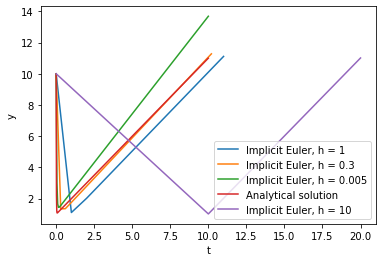

In [59]:
#1.d)

def f(t, y):
    return -100*y + 100*t +101

def func(Y, t, y, h):
    return Y - y - h*f(t, Y)

def analytic(y0, tn):
    t = np.linspace(0, tn, 1000)
    return 1 + t + (y0 - 1)*np.exp(-100*t), t

def Euler(y0, tn, h):
    T = np.array([0])
    y = np.array([y0])
    while T[-1] <= tn:
        y1 = optimize.fixed_point(func, [y[-1]], args=(T[-1], y[-1], h))
        y = np.append(y, y1)
        T = np.append(T, T[-1] + h)
    return y, T

1.e)

y005, T005 = Euler(10, 10, 0.05)
y03, T03 = Euler(10, 10, 0.3)
y1, T1 = Euler(10, 10, 1)
y10, T10 = Euler(10, 10, 10)
anY, t = analytic(10, 10)

plt.plot(T1, y1, label = "Implicit Euler, h = 1")
plt.plot(T03, y03, label = "Implicit Euler, h = 0.3")
plt.plot(T005, y005, label = "Implicit Euler, h = 0.005")
plt.plot(t, anY, label = "Analytical solution")
plt.plot(T10, y10, label = "Implicit Euler, h = 10")
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc = "best")
plt.show()

In [ ]:
#I chose implicit Euler as my method because it would be stable for any positive time step.
#In the plot above the time step h = 10 was the largest (integer) one that still has the bottom point within
#the time interval, any higher time step is still stable, but the error becomes very large.
#The time step h = 1 is not so bad either, but the best results were achieved by h = 0.3. When the time step was set to
#h = 0.001 the plot blew up out of proportions

In [145]:
#2.a)

k1, k2, k3 = 0.04, 3e7, 1e4

def f(t, y):
    return [-1*k1*y[0] + k3*y[1]*y[2], k1*y[0] - k2*(y[1]**2) - k3*y[1]*y[2], k2*(y[1]**2)]

u0 = [1, 0, 0]
t0 = 0
t_final = 0.3
ode15s = scipy.integrate.ode(f)
ode15s.set_integrator('vode', method='bdf', nsteps=3000, order=15,)
ode15s.set_initial_value(u0, t0)
print(ode15s.integrate(t_final))

[9.88673939e-01 3.44771577e-05 1.12915836e-02]


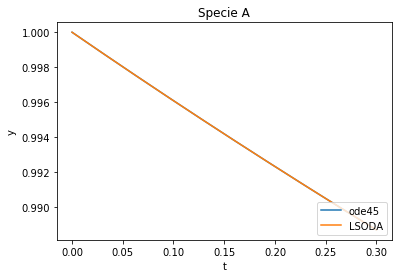

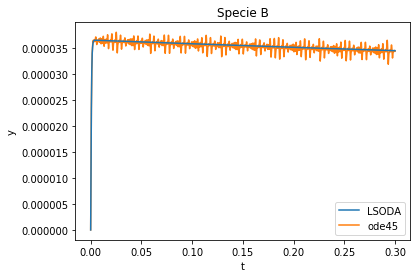

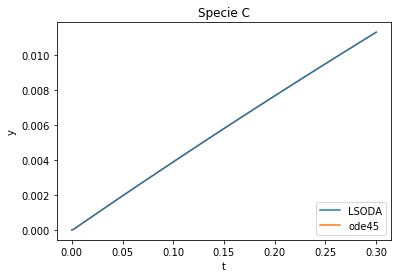

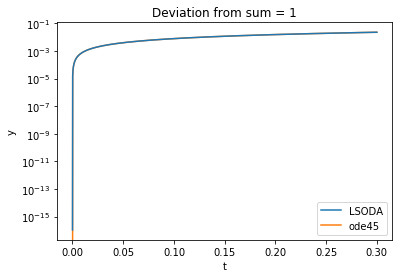

In [175]:
#2.b)

sol45 = solve_ivp(f, [t0, t_final], [1, 0, 0], method = 'RK45', rtol = 1e-3, atol = 1e-6 ,dense_output=True)
t = np.linspace(t0, t_final, 3000)
z45 = sol45.sol(t)

Lsol = solve_ivp(f, [t0, t_final], [1, 0, 0], method = 'LSODA', rtol = 1e-3, atol = 1e-6 ,dense_output=True)
t = np.linspace(t0, t_final, 3000)
zsoda = Lsol.sol(t)


plt.figure(1)
plt.title("Specie A")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(t, z45[0], label = "ode45")
plt.plot(t, zsoda[0], label = "LSODA")
plt.legend(loc =4)

plt.figure(2)
plt.title("Specie B")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(t, zsoda[1], label = "LSODA", zorder = 2)
plt.plot(t, z45[1], label = "ode45", zorder = 1)
plt.legend(loc =4)

plt.figure(3)
plt.title("Specie C")
plt.xlabel("t")
plt.ylabel("y")
plt.plot(t, zsoda[2], label = "LSODA", zorder = 2)
plt.plot(t, z45[2], label = "ode45", zorder = 1)
plt.legend(loc =4)



plt.figure(4)
plt.title("Deviation from sum = 1")
plt.xlabel("t")
plt.ylabel("y")
plt.semilogy(t, np.abs(1 - zsoda[0] + zsoda[1] + zsoda[2]), label = "LSODA", zorder = 2)
plt.semilogy(t, np.abs(1 - z45[0] + z45[1] + z45[2]), label = "ode45", zorder = 1)
plt.legend(loc =4)
plt.show()

In [ ]:
#I used scipy's LSODA method instead of matlabs ode15s and ode23s, and compared it to scipys version of ode45.
#The two graphs are indistuingishable except for the plot of specie B, where the RK45 really struggles to
#stay close to the line from LSODA. Here I used rtol = 1e-3 and atol = 1e-6 in order to bring out the difference between
#the two methods in plot of B.

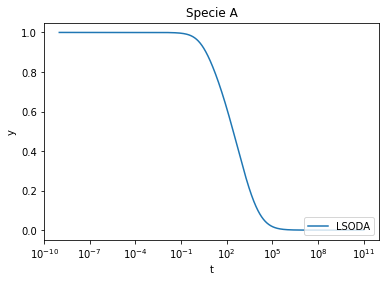

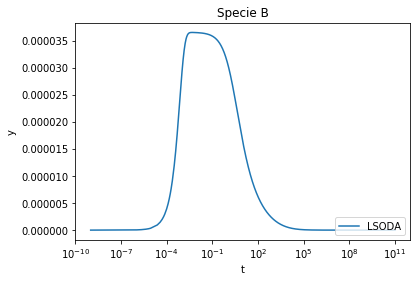

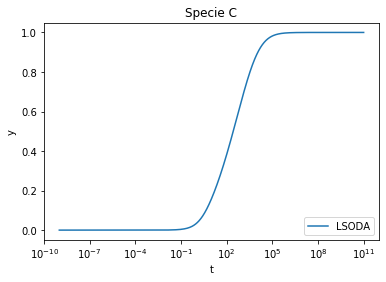

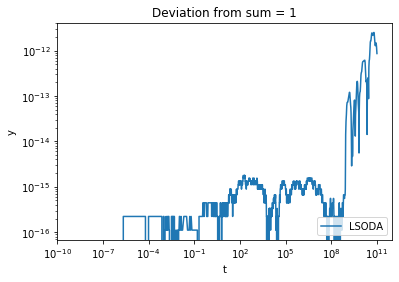

In [216]:
#2.c)
t_final = 1e11
t0 = 1e-9
Lsol = solve_ivp(f, [t0, t_final], [1, 0, 0], method = 'LSODA', rtol = 1e-12, atol = 1e-12 ,dense_output=True)

plt.figure(1)
plt.title("Specie A")
plt.xlabel("t")
plt.ylabel("y")
plt.semilogx(Lsol.t, Lsol.y[0], label = "LSODA")
plt.legend(loc =4)

plt.figure(2)
plt.title("Specie B")
plt.xlabel("t")
plt.ylabel("y")
plt.semilogx(Lsol.t, Lsol.y[1], label = "LSODA")
plt.legend(loc =4)

plt.figure(3)
plt.title("Specie C")
plt.xlabel("t")
plt.ylabel("y")
plt.semilogx(Lsol.t, Lsol.y[2], label = "LSODA")
plt.legend(loc =4)
plt.show()

plt.figure(4)
plt.title("Deviation from sum = 1")
plt.xlabel("t")
plt.ylabel("y")
plt.loglog(Lsol.t, np.abs(1 - (Lsol.y[0] + Lsol.y[1] + Lsol.y[2])), label = "LSODA")
plt.legend(loc =4)
plt.show() 

In [217]:
#I had to increase atol and rtol a lot (1e-12) in order to get the plot of mass B to look similar enough to the one
#in the assignment, but the computation still worked quickly so it was no problem. The deviation is not that high.












